In [3]:
# check your installation
from bert_score import BERTScorer
import logging
import transformers

transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["xtick.major.size"] = 0
rcParams["xtick.minor.size"] = 0
rcParams["ytick.major.size"] = 0
rcParams["ytick.minor.size"] = 0

rcParams["axes.labelsize"] = "large"
rcParams["axes.axisbelow"] = True
rcParams["axes.grid"] = True

import torch

import os

os.chdir("/data2/huchao/archived_11.2024_1_confused_novel/bigcode-evaluation-harness")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(device)
import json
scorer = BERTScorer(lang="en", rescale_with_baseline=True)


In [ ]:
# init

# load data

### 加载评测脚本生成的数据

In [11]:
def handle_java_gen(generations):
    new_generations = [
        gen.strip()
        .replace("The goal of this function is to ", "")
        .strip()
        .strip('"')
        .strip("'")
        for gen in generations
    ]
    return new_generations

gen_path = "tmp/test_gen_java_one_more.json"
ref_path = "tmp/test_ref_java_one_more.json"
with open(ref_path, "r") as f:
    refs = json.load(f)
with open(gen_path, "r") as f:
    gens = json.load(f)
gens = handle_java_gen(gens)
print(len(gen_path))

from scores.bleu import bleuForList
bleu, bleu_list = bleuForList(gens, refs)



31


ModuleNotFoundError: No module named 'path_utils'

In [1]:
with open(
    "../ref_and_gen/CodeLlama-7b-hf/batch_test_semantic_FNE_200_fill.json", "r"
) as f:
    data = json.load(f)
    cands = data
with open(
    "../ref_and_gen/CodeLlama-7b-hf/batch_test_semantic_FNE_200_ref.json", "r"
) as f:
    data = json.load(f)
    refs = data
print(f"cands size = {len(cands)}, refs size = {len(refs)}")

NameError: name 'json' is not defined

In [3]:
print(cands[0])
print(refs[0])


    Get the url from the xml data.
    :param xml_data: the xml data.
    :return: the url.
str->list
    Convert XML to URL List.
    From Biligrab.


In [2]:
cands = [
    "This method implements the `accept` method of the `Subscription` interface, which is used to notify a subscriber of the events that have been added to this `ObjectArryMulticast` instance."

]
refs = [
    "Interprets the contents as NotificationLite objects and calls the appropriate Subscriber method ."
]

### 加载测试Prompt生成的临时数据

In [54]:
lang = "java"
lang = "go"
with open(f"tmp/test_gen_{lang}_2.json", "r") as f:
    data = json.load(f)
    cands = data
    cands = [cand.split("\n")[0] for cand in cands]
    cands = [cand.replace("The goal of this function is to ", "") for cand in cands]
with open(f"tmp/test_ref_{lang}.json", "r") as f:
    data = json.load(f)
    refs = data
print(f"cands size = {len(cands)}, refs size = {len(refs)}")

cands size = 20, refs size = 20


### display data

In [55]:
idx = 0

In [63]:
from colorama import Fore
cand = cands[idx]
ref = refs[idx]

print(f'{Fore.GREEN}cand = {Fore.RESET}\n{cand}')
print(f'{Fore.BLUE}ref = {Fore.RESET}\n{ref}')
idx += 1

cand = 
 create a new TLS certificate from a certificate and key file.
ref = 
NewCert generates TLS cert by using the given cert key and parse function .


# get score

java前20个例子，F1得分为0.223
go 前20个例子，F1得分为 0.116
结论：得分都很低

更新Prompt之后，
Java前20个例子，F1得分为0.352
Go前20个例子，F1得分为0.233

In [53]:
P, R, F1 = scorer.score(cands, refs)
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.352


# display scores

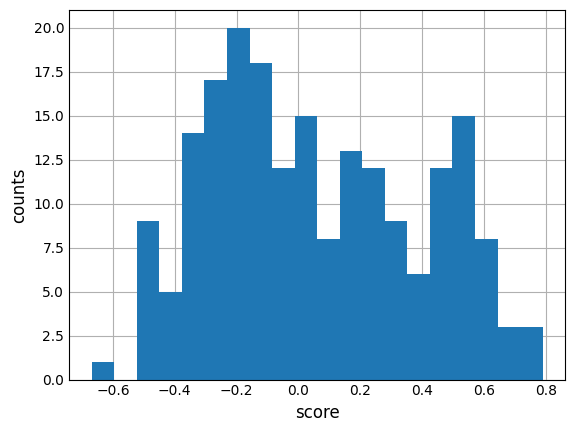

In [7]:
plt.hist(F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

# 检查对Java和Go的结果的处理


In [4]:
from tests.path_utils import FinalPath
import json

import os

os.chdir("/data2/huchao/11.novels/bigcode-evaluation-harness")
model_name = "CodeLlama-7b-hf"
partition_name = "single"
type_name = "semantic"
mode_name = "FNE"
lang_name = "java"
lang_name = "go"
task_name = "work"
start_point = 0
limit = 2000

gen_path, ref_path = FinalPath.get_generation_path(
    model_name,
    partition_name,
    type_name,
    mode_name,
    lang_name,
    task_name,
    start_point,
    limit,
)

gen_path


with open(gen_path, "r") as f:
    gen_data = json.load(f)
print(len(gen_data))

2000


In [5]:
# 删除匹配到的 The goal of this function is to
# 删除前后空行
# 删除前后引号
from colorama import Fore
for idx in range(2000):
    cand = gen_data[idx]
    target = "The goal of this function is to"
    cand = cand.replace(target, '')
    cand = cand.strip()
    cand = cand.strip('"')
    cand = cand.strip("'")
    
    if target not in cand:
        print(f'{Fore.RED} idx = {idx}{Fore.RESET}\n{Fore.GREEN}cand = {Fore.RESET}\n{cand}')

 idx = 0
cand = 
execute a transaction with prefetching support.
 idx = 1
cand = 
return the minimum revision number from a set of responses.
 idx = 2
cand = 
create a slice of etcd v3.Cmp objects that compare the mod revision of each key in the write set to a given revision.
 idx = 3
cand = 
create a new STM with the given client and apply function, using the given context and isolation level.
 idx = 4
cand = 
create a new STM with the given client and apply function, using the given context and isolation level.
 idx = 5
cand = 
create a new STM with the given client and apply function, using the given context and isolation level.
 idx = 6
cand = 
create a new x509.CertPool from a list of CA files.
 idx = 7
cand = 
load a TLS certificate and key from files and return a pointer to a tls.Certificate object.
 idx = 8
cand = 
pause the peer's message app reader and msg app v2 reader.
 idx = 9
cand = 
resume message appending and message appending v2 for a peer.
 idx = 10
cand = 
determine

# CodeBERT数据评分

In [ ]:
import json
import os

path = "ref_and_gen/others/PLBart"

mode_1_names = ["branch", "dead", "op"]
mode_2_names = ["change", "func", "shuffle", "hfreq"]
cross_name_list = ["cross"]
name_dict = {
    "semantic": ["IOE", "FNE", "IHR", "IRS"],
    "synatic": ["DBI", "HVI", "OOS"],
    "cross": [],
    "origin": ["CSN"],
}
import os

result_dir = "/data2/huchao/11.novels/models/results/CodeBERT"
partition_name = "origin"
type_name = "origin"
mode_name = "origin"
lang_name = "python"
ref_name = "test_0.gold"
gen_name = "test_0.output"

ref_path = (
    f"{result_dir}/{partition_name}/{type_name}/{mode_name}/{lang_name}/{ref_name}"
)
gen_path = (
    f"{result_dir}/{partition_name}/{type_name}/{mode_name}/{lang_name}/{gen_name}"
)


def read_gold_and_output(ref_path, gen_path):
    with open(ref_path, "r") as f:
        lines = f.readlines()
    refs = [line.split("\t") for line in lines]
    refs = [(int(ref[0]), ref[1].strip()) for ref in refs]
    with open(gen_path, "r") as f:
        lines = f.readlines()
    cands = [line.split("\t") for line in lines]
    cands = [(int(cand[0]), cand[1].strip()) for cand in cands]
    # 检查编号是否对齐
    assert len(refs) == len(cands)
    for ref, cand in zip(refs, cands):
        assert ref[0] == cand[0]
    cands = [cand[1] for cand in cands]
    refs = [ref[1] for ref in refs]
    return refs, cands


# 计算评分
refs, cands = read_gold_and_output(ref_path, gen_path)
# print(refs[0:10])
P, R, F1 = scorer.score(cands, refs)
print(f"System level F1 score: {F1.mean():.3f}")

# PLBart 数据评分

## Java+Python数据评分（已经生成）

## Go语言数据评分（新的路径）

# done